In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"C:\Users\tahiy\Downloads\transfusion.data")
df
#R (Recency - months since last donation),
#F (Frequency - total number of donation),
#M (Monetary - total blood donated in c.c.),
#T (Time - months since first donation), and
#a binary variable representing whether he/she donated blood in March 2007 (1 yes 0 no). 

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [2]:
df.columns
df.columns = ["Recency (months)", "Frequency (times)", "Monetary (c.c. blood)", "Time (months)", "Donated March"]

In [3]:
df.isna().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
Donated March            0
dtype: int64

In [4]:
stats = df[["Time (months)", "Recency (months)", "Frequency (times)"]].describe()
stats

,Time (months),Recency (months),Frequency (times)
count,748.000000,748.000000,748.000000
mean,34.282086,9.506684,5.514706
std,24.376714,8.095396,5.839307
min,2.000000,0.000000,1.000000
25%,16.000000,2.750000,2.000000
50%,28.000000,7.000000,4.000000
75%,50.000000,14.000000,7.000000
max,98.000000,74.000000,50.000000


In [5]:
variance = df[["Time (months)", "Recency (months)", "Frequency (times)"]].var()
variance

Time (months)        594.224203
Recency (months)      65.535430
Frequency (times)     34.097508
dtype: float64

In [6]:
donated = df[df["Donated March"] == 1]
df[df["Donated March"] == 1][["Time (months)", "Recency (months)", "Frequency (times)"]].describe()


,Time (months),Recency (months),Frequency (times)
count,178.000000,178.000000,178.000000
mean,32.719101,5.455056,7.797753
std,23.629431,5.170615,8.036892
min,2.000000,0.000000,1.000000
25%,15.250000,2.000000,3.000000
50%,28.000000,4.000000,6.000000
75%,44.500000,4.750000,9.000000
max,98.000000,26.000000,50.000000


In [7]:
notdonated = df[df["Donated March"] == 0]
df[df["Donated March"] == 0][["Time (months)", "Recency (months)", "Frequency (times)"]].describe()

,Time (months),Recency (months),Frequency (times)
count,570.000000,570.000000,570.000000
mean,34.770175,10.771930,4.801754
std,24.605388,8.425039,4.746768
min,2.000000,0.000000,1.000000
25%,16.000000,4.000000,2.000000
50%,28.000000,11.000000,3.000000
75%,52.000000,16.000000,6.000000
max,98.000000,74.000000,44.000000


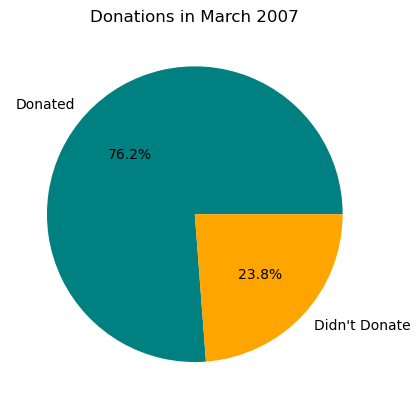

In [8]:
donationCounts = df["Donated March"].value_counts()

plt.pie(donationCounts, labels=["Donated", "Didn't Donate"], autopct = '%0.1f%%', colors = ["teal", "orange"])
plt.title("Donations in March 2007")
plt.show()

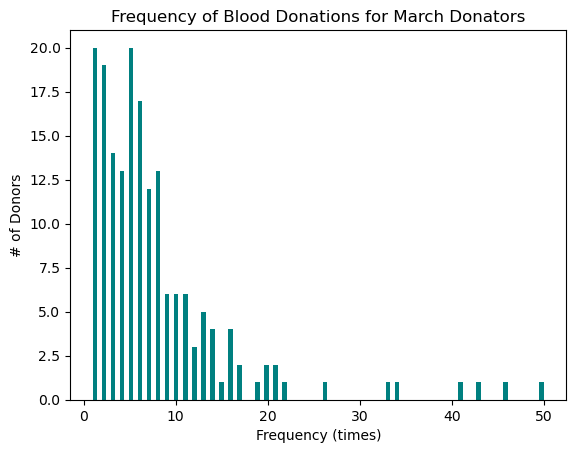

In [9]:
plt.hist(donated["Frequency (times)"], bins=100, color = "teal")

plt.xlabel("Frequency (times)")
plt.ylabel("# of Donors")
plt.title("Frequency of Blood Donations for March Donators")
plt.show()

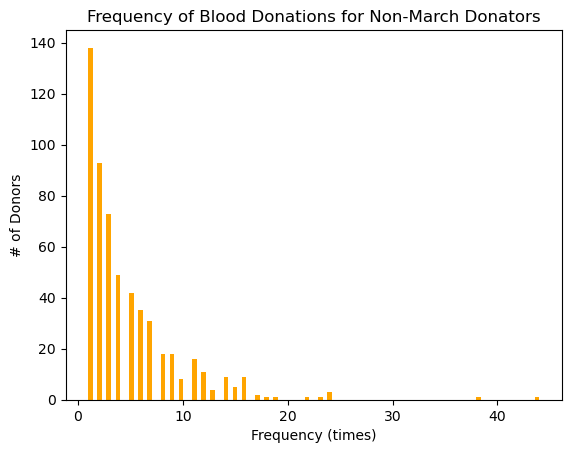

In [10]:
plt.hist(notdonated["Frequency (times)"], bins=100, color = "orange")

plt.xlabel("Frequency (times)")
plt.ylabel("# of Donors")
plt.title("Frequency of Blood Donations for Non-March Donators")
plt.show()

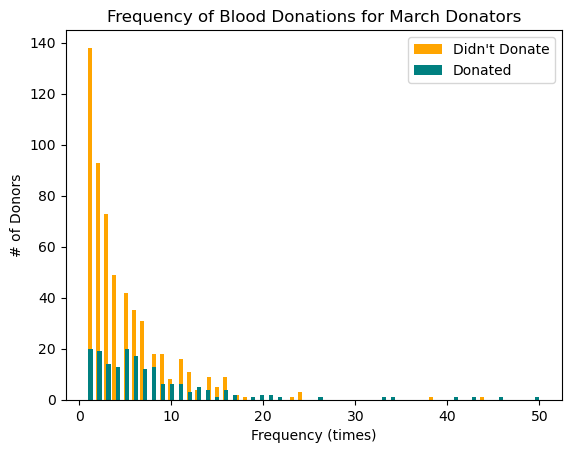

In [11]:
plt.hist(notdonated["Frequency (times)"], bins=100, color = "orange")
plt.hist(donated["Frequency (times)"], bins=100, color = "teal")

plt.xlabel("Frequency (times)")
plt.ylabel("# of Donors")
plt.title("Frequency of Blood Donations for March Donators")
plt.legend(["Didn't Donate", "Donated"])
plt.show()

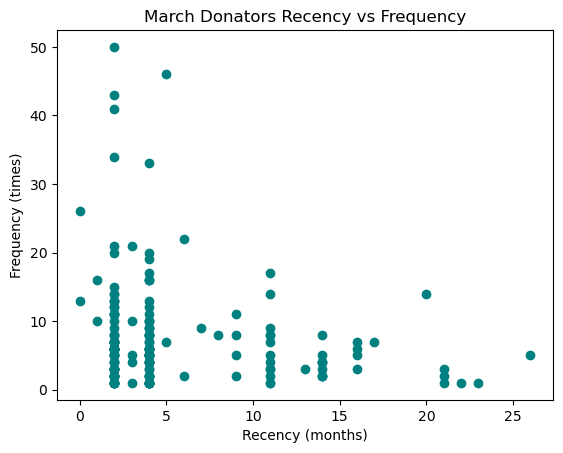

In [12]:
plt.scatter(x = donated["Recency (months)"], y = donated["Frequency (times)"], color = "teal")

plt.xlabel("Recency (months)")
plt.ylabel("Frequency (times)")

plt.title("March Donators Recency vs Frequency")
plt.show()

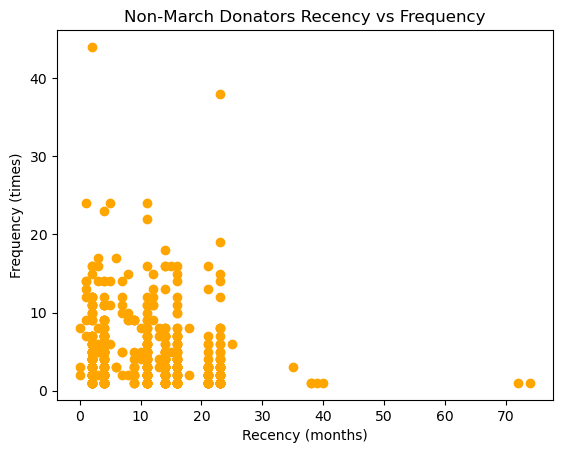

In [13]:
plt.scatter(x = notdonated["Recency (months)"], y = notdonated["Frequency (times)"], color = "orange")

plt.xlabel("Recency (months)")
plt.ylabel("Frequency (times)")

plt.title("Non-March Donators Recency vs Frequency")
plt.show()

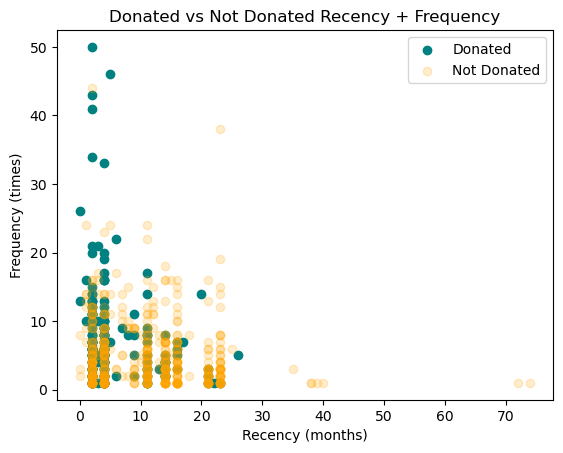

In [14]:
plt.scatter(x = donated["Recency (months)"], y = donated["Frequency (times)"], color = "teal")
plt.scatter(x = notdonated["Recency (months)"], y = notdonated["Frequency (times)"], color = "orange", alpha = 0.20)

plt.xlabel("Recency (months)")
plt.ylabel("Frequency (times)")

plt.title("Donated vs Not Donated Recency + Frequency")
plt.legend(["Donated", "Not Donated"])
plt.show()